In [23]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

from utils import clustering
from utils import CommonFunctions as CF

import importlib
importlib.reload(clustering)

<module 'utils.clustering' from '/home/barzon/Network_geometry/utils/clustering.py'>

In [2]:
N = 128
mean_deg = 16

num_groups = 4; nodes_per_group = N//num_groups; kave = mean_deg; k_out = .2#k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

A_gn = nx.to_numpy_array(G_gn)

Block model probs: in 0.493750 - out 0.002083
Mean degree 15.171875


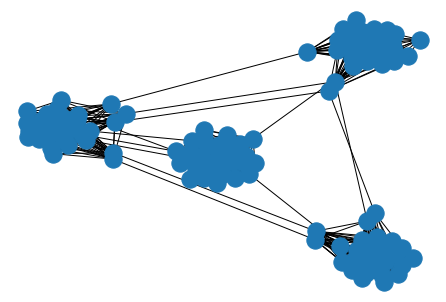

In [3]:
nx.draw(G_gn)

# Social network
## Karate club

In [18]:
karate = nx.karate_club_graph()
configuration = nx.random_reference(karate, niter=5)

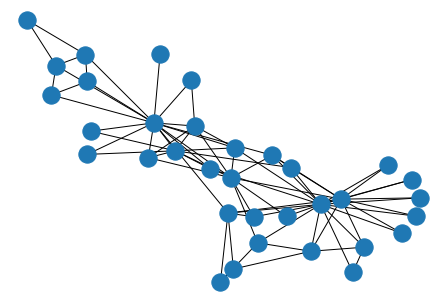

In [3]:
nx.draw(karate)

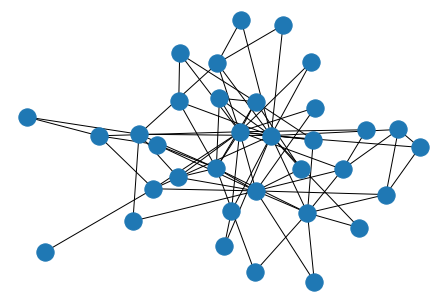

In [4]:
nx.draw(configuration)

In [19]:
karate = nx.to_numpy_array(karate)
configuration = nx.to_numpy_array(configuration)

In [6]:
comms = clustering.community_detection(karate, 'louvain')

Found 4 communities


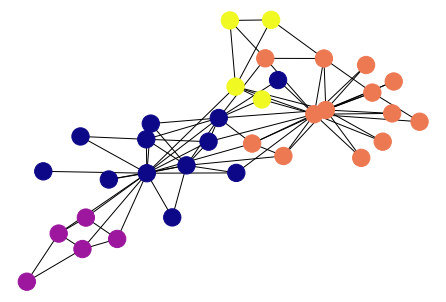

In [7]:
clustering.plot_communities(karate, comms)

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/34 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


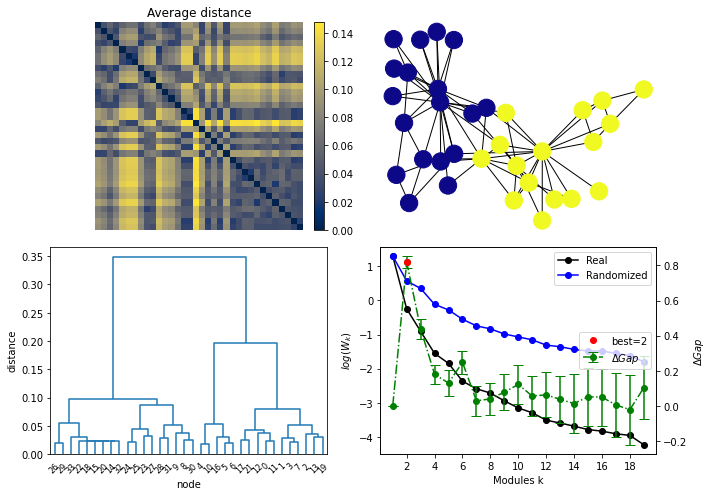

In [24]:
res = clustering.clustering_diffusion_distance(karate, precomputed=None, clust_max=20, show=True, method='ward')

COMMUNITY DETECTION - DIFFUSION DISTANCE
- Compute average distance...


  0%|          | 0/34 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


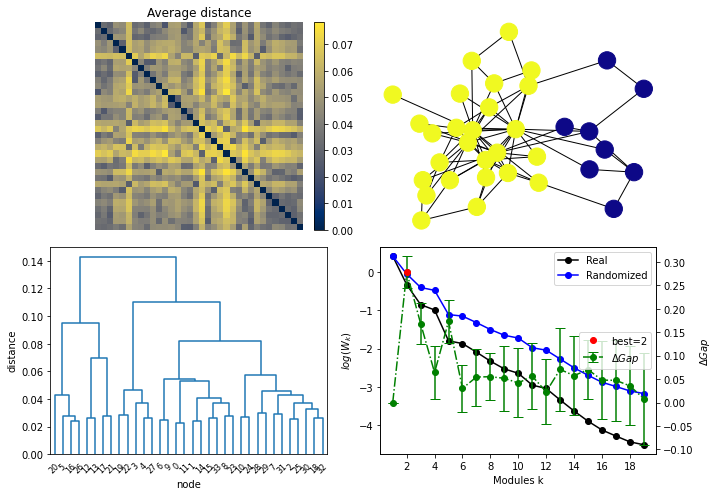

In [25]:
res_conf = clustering.clustering_diffusion_distance(configuration, clust_max=20, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Synchronization


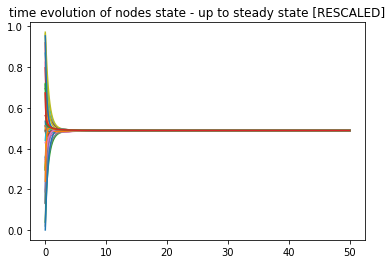

- Compute average distance...


  0%|          | 0/34 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


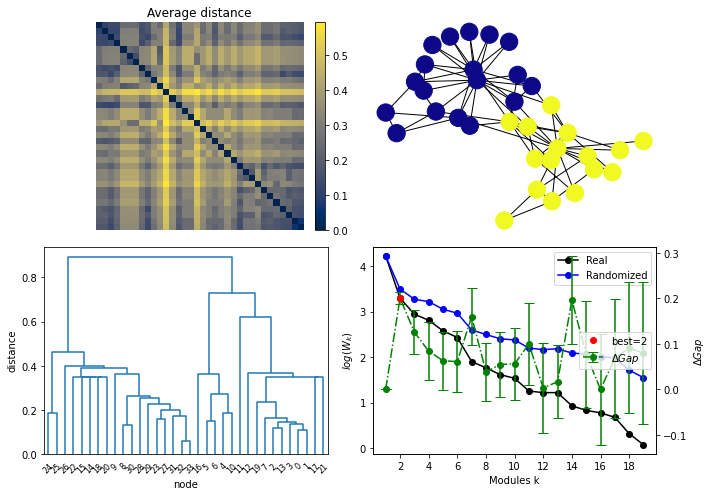

In [28]:
res = clustering.clustering_jacobian_distance(karate, 'Synchronization', clust_max=20, norm=True, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Epidemics


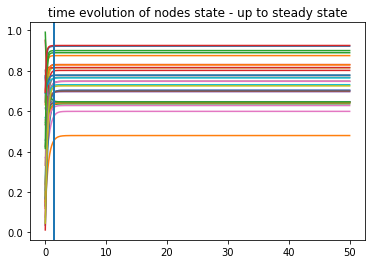

- Compute average distance...


  0%|          | 0/34 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


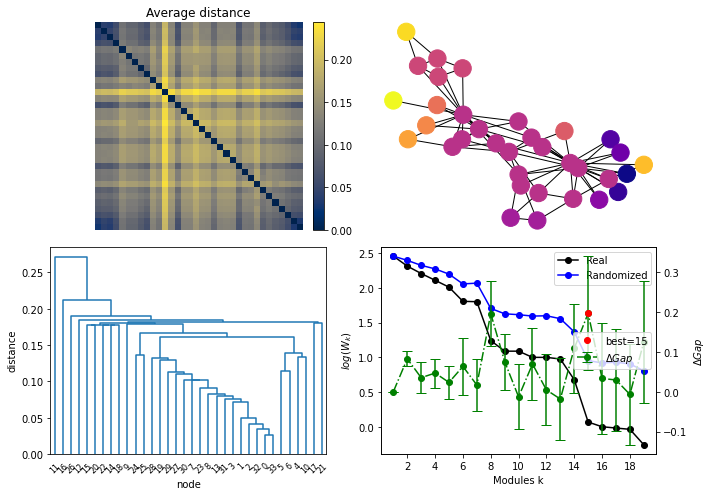

In [26]:
res = clustering.clustering_jacobian_distance(karate, 'Epidemics', clust_max=20, norm=True, show=True, method='ward')

COMMUNITY DETECTION - JACOBIAN DISTANCE
Dynamics: Biochemical


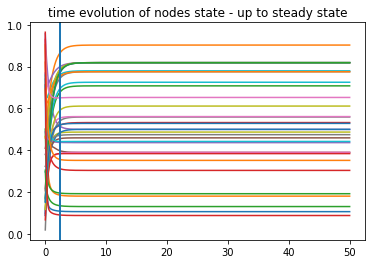

- Compute average distance...


  0%|          | 0/34 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...
- Compute gap statistics...


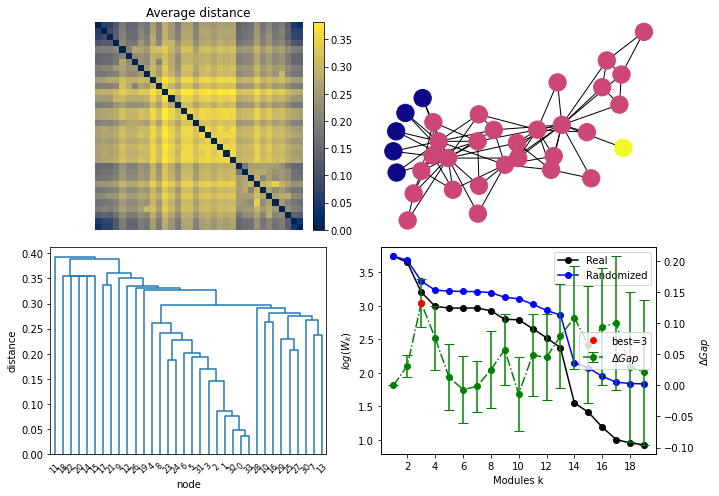

In [31]:
res = clustering.clustering_jacobian_distance(karate, 'Biochemical', clust_max=20, norm=True, show=True, method='ward')